In [ ]:
import numpy as np
#2a
#Matrix of grams per serving of carbs, fats and proteins for different cereals
C_1 = np.array([[5,4,3],[2, 1, 1], [6,2,1]])
#total calories per cereal
c_total = np.array([300, 110,270])
#compute the calories per gram weights
W_cereal = np.linalg.solve(C_1, c_total)
#print cereal weights calories per gram
print(W_cereal)

#


[38.  8. 26.]


In [ ]:
from IPython.lib.display import IFrame
import scipy.io as sio
import numpy as np
##### Part a #####
# load the training data X and the training labels y
data_file = sio.loadmat('face_emotion_data.mat')
X = data_file['X']
y = data_file['y']
# n = number of data points
# p = number of features
n, p = np.shape(X)
# Solve the least -squares solution. w: weight coefficients.
w = np.linalg.inv(X.T@X) @X.T@y
print(w)

#3e) Cross validation
err_perc = 0
for i in range(8):
  if i == 0:
    X_Train = X[16 : , :]
    y_train = y[16: ]
  elif i == 7:
    X_Train = X[0 : 112, :]
    y_train = y[0 : 112]
  else: 
    X_Train = np.vstack((X[0:16*i, :], X[16*(i+1): 128, :]))
    y_train = np.append(y[0:16*i], y[16*(i+1): ])
  w = np.linalg.inv(X_Train.T@X_Train) @X_Train.T@y_train
#compute number of mistakes on holdout set
  X_Test = X[16*i: 16*(i+1), :]
  y_test = y[16*i: 16*(i+1)]
  for j in range(16):
    if np.sign(X_Test[j]@w) != y_test[j]:
      error_total = error_total + 1
  print(error_total)
  err_perc = (error_total / 16) + err_perc
  error_total= 0    
error_avg = err_perc / 8 
print(error_avg)


FileNotFoundError: ignored

In [ ]:
#3e) Cross validation
err_perc = 0
for i in range(8):
  if i == 0:
    X_Train = X[16 : , 0:4]
    y_train = y[16: ]
  elif i == 7:
    X_Train = X[0 : 112, 0:4]
    y_train = y[0 : 112]
  else: 
    X_Train = np.vstack((X[0:16*i, 0:4], X[16*(i+1): 128, 0:4]))
    y_train = np.append(y[0:16*i], y[16*(i+1): ])
  w = np.linalg.inv(X_Train.T@X_Train) @X_Train.T@y_train
#compute number of mistakes on holdout set
  X_Test = X[16*i: 16*(i+1), 0:4]
  y_test = y[16*i: 16*(i+1)]
  for j in range(16):
    if np.sign(X_Test[j]@w) != y_test[j]:
      error_total = error_total + 1
  err_perc = (error_total / 16) + err_perc
  error_total= 0    
error_avg = err_perc / 8 
print(error_avg)


NameError: ignored

['black', 'orange', 'black', 'orange', 'orange', 'black', 'orange', 'black', 'orange', 'orange', 'black', 'orange', 'orange', 'orange', 'orange', 'black', 'black', 'black', 'orange', 'black', 'orange', 'black', 'orange', 'black', 'black', 'orange', 'black', 'orange', 'black', 'orange', 'black', 'orange', 'black', 'orange', 'black', 'orange', 'black', 'orange', 'orange', 'orange', 'black', 'orange', 'orange', 'black', 'orange', 'black', 'black', 'orange', 'orange', 'black', 'orange', 'black', 'orange', 'black', 'black', 'orange', 'black', 'orange', 'black', 'orange', 'black', 'orange', 'black', 'black', 'orange', 'black', 'black', 'black', 'orange', 'orange', 'black', 'orange', 'black', 'orange', 'black', 'orange', 'black', 'orange', 'orange', 'orange', 'orange', 'black', 'orange', 'black', 'orange', 'black', 'orange', 'black', 'orange', 'orange', 'black', 'orange', 'black', 'black', 'black', 'orange', 'black', 'black', 'orange', 'black', 'orange', 'black', 'orange', 'orange', 'black', 

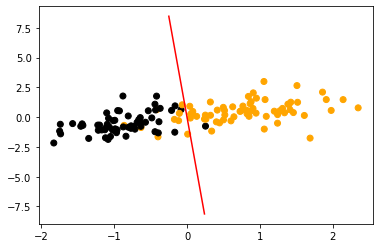

In [ ]:
from matplotlib import colors
import matplotlib as mpl
import matplotlib.pyplot as plt
#Compute weights with 2 most important features and plot data
X_low = np.column_stack((X[:, 0], X[:, 3]))
w = np.linalg.inv(X_low.T@X_low) @X_low.T@y
#Now make a plot of the 2 dimensions and color in the different y values and then draw the classifier line
#below is an indicator that indicates the color of the plot depending on if the 
#x is smiling or not. Orange for smile black for not
def ind(x):
  if x == 1:
    return "orange"
  else:
    return "black"
x = np.arange(-0.25,.25, .01)
y_d= (w[0] / w[1])*x 
colors=[ind(y[i]) for i in range(128)]
print(colors)
plt.scatter(X_low[:, 0], X_low[:, 1], c=colors)
plt.plot(x,y_d, color = "red")


In [ ]:
#Problem 4c code
data_file = sio.loadmat('polydata (1).mat')
x = data_file['x']
y = data_file['y']


#We will solve a least squares fit for the d=1,2, 3 case
#Then, we will plot the points with the fitted line for all of the (x_i,y_i) 
#pairs

#First we build our d=1,2,3 poly fitted matrix

X_1 = np.column_stack((np.power(x, 0), x))
X_2 = np.column_stack((np.power(x, 0), x, np.power(x,2)))
X_3 = np.column_stack((np.power(x, 0), x, np.power(x,2), np.power(x,3)))

#Next, we compute the weights
w_1 = np.linalg.inv(X_1.T@X_1) @X_1.T@y
w_2 = np.linalg.inv(X_2.T@X_2) @X_2.T@y
w_3 = np.linalg.inv(X_3.T@X_3) @X_3.T@y
#Lastly, we plot the fits
plt.scatter(x,y)
t = np.arange(0, 1, .01)
y_1 = w_1[0] + w_1[1]*t
y_2 = w_2[0] + w_2[1]*t + w_2[2]*t**2
y_3 = w_3[0] + w_3[1]*t + w_3[2]*t**2 + w_3[3]*t**3
plt.plot(t, y_1, "red")
plt.plot(t, y_2, "green")
plt.plot(t, y_3, "purple")






FileNotFoundError: ignored